In [1]:
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [4]:
import pathlib
data_train = 'D:/07 Skripsi/dataset/a-train_images'
data_test = 'D:/07 Skripsi/dataset/b-test_images'

In [5]:
#preprocessing data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
            data_train,
            target_size=(150,150),
            class_mode='categorical',
            batch_size=64)
test_generator = test_datagen.flow_from_directory(
            data_test,
            target_size=(150,150),
            class_mode='categorical',
            batch_size=64)

Found 3475 images belonging to 6 classes.
Found 2174 images belonging to 6 classes.


In [14]:
base_model = ResNet50(input_shape = (150,150,3),
                  include_top=False,
                  weights=None)

In [15]:
for layer in base_model.layers:
    layer.trainable=False

In [16]:
from tensorflow.keras import Model
from tensorflow.keras import layers

In [17]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.Dense(6, activation = 'softmax')(x)

model = Model (base_model.input,x)

In [19]:
model.compile(optimizer = 'Adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [22]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [23]:
history = model.fit(
        train_generator,
        epochs = 20,
        steps_per_epoch=54,
        validation_data = test_generator,
        verbose = 1,
        validation_steps=33)

Epoch 1/20
54/54 [==============================] - 441s 8s/step - loss: 1.3368 - accuracy: 0.4899 - val_loss: 1.2858 - val_accuracy: 0.5052
Epoch 2/20
54/54 [==============================] - 458s 9s/step - loss: 1.2602 - accuracy: 0.5057 - val_loss: 1.2663 - val_accuracy: 0.4967
Epoch 3/20
54/54 [==============================] - 424s 8s/step - loss: 1.2056 - accuracy: 0.5312 - val_loss: 1.1965 - val_accuracy: 0.5270
Epoch 4/20
54/54 [==============================] - 424s 8s/step - loss: 1.1558 - accuracy: 0.5485 - val_loss: 1.1970 - val_accuracy: 0.5142
Epoch 5/20
54/54 [==============================] - 415s 8s/step - loss: 1.1447 - accuracy: 0.5570 - val_loss: 1.3002 - val_accuracy: 0.4645
Epoch 6/20
54/54 [==============================] - 417s 8s/step - loss: 1.1293 - accuracy: 0.5702 - val_loss: 1.2777 - val_accuracy: 0.4891
Epoch 7/20
54/54 [==============================] - 410s 8s/step - loss: 1.1171 - accuracy: 0.5664 - val_loss: 1.1367 - val_accuracy: 0.5455
Epoch 8/20
54

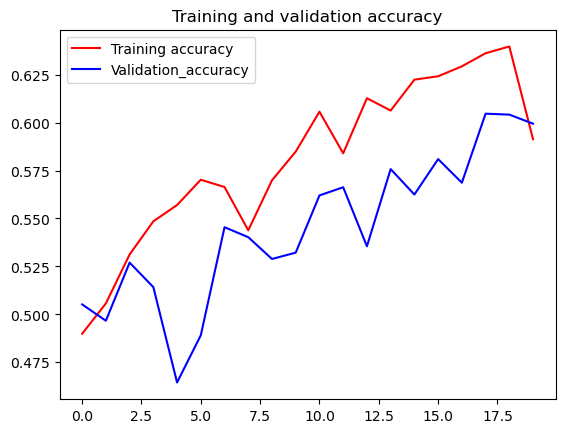

<Figure size 640x480 with 0 Axes>

In [24]:
#plot the result 
 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation_accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
1